# Make Your Professional Service Firm Grow (Part 4)
## Reaching The Expert Cash Target: Maximum Growth Scenario

Now we know how to reach the easy cash target, we need to look at the expert target. This is closely associated with the question "How much could we make the PSF grow by?"

The main constraint that stops you from hiring  thousands of business developers straight away is that growth costs money:  you first have to pay for business development before you start making money with projects. In a real life situation, you are betting your shareholders money on the future by hiring many business developers and project delivery staff and hoping that the business developers will manage to aquire the projects you forecast. If they don't, you will go bust. And if they do, and you don't manage to hire the required staff or integrate them well you risk losing a lot of business. So either way growth is a risky endeavour.

Nevertheless, it is interesting to work out what the maximum possible growth could be. An easy way to work this out is as follows - from the scenarios above we know that whatever we do our cashflow will not increase until month 13. Now if we take a look at month 12 of the base case, then this is how much cash we could use to hire extra staff. We also know that we have to pay for 8 months of the new business developer wages and for two months of the new project wages before revenue sarts increasing due to the new hires. So if we hire __maximumBusinessDevelopmentHires__ business developers, the following equation must hold true:

`maxCash = 8 * maximumBusinessDevelopmentHires * staffCost + 2 * 4 * maximumBusinessDevelopmentHires * staffCost`

Solving this we arive at a value of 103 new business developers and thus 412 project staff, given a total of 515 new staff.  Try using these numbers in the game!

Here is the calculation done using BPTK and SymPy.

In [7]:
import pandas as pd
from BPTK_Py import bptk
bptk=bptk()

In [8]:
df_psf_base=bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['base'], 
    equations=["cash.cash","revenue.revenue","cost.staffCost","cost.overheadCost","cash.easyTargetCash","revenue.projectDeliveryFee",
              "revenue.collectionTime"],
    title="Base Case",
    x_label="Months",
    y_label="k€",
    return_df=True
)

In [9]:
totalRevenue=df_psf_base["revenue.revenue"].iloc[0]*1000
staffCost=df_psf_base["cost.staffCost"].iloc[0]*1000
overheadCost=df_psf_base["cost.overheadCost"].iloc[0]*1000
totalCost=staffCost+overheadCost
cashFlow=totalRevenue-totalCost
initialCash=1000000
cash2Years=23*cashFlow+initialCash

In [10]:
maxCash = df_psf_base["cash.cash"].iloc[12]*1000

In [11]:
from sympy import symbols, solve

y = symbols('y')
mBuDH_expr = (y*8*staffCost + 
 2*y*4*staffCost)-maxCash
maximumBusinessDevelopmentHires = solve(mBuDH_expr)[0]

In [12]:
maximumBusinessDevelopmentHires

0.518478260869566

Something unexpected happens: despite our calculation, our cash actually drops below zero, so in this case we are bankrupt due to illiquidity.

I've plotted and tabulated the numbers for this scenario below:

In [7]:
bptk.register_scenarios(scenario_manager="psf",scenarios={
"growth145Person":{
"points":{
"staff.hiringRate":[(1, 29), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 116), (8, 0), (9, 
  0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 
  0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 
  0), (24, 0)],
"staff.businessDevelopmentAllocation%":[(1, 20), (2, 20), (3, 20), (4, 20), (5, 6900/229), (6, 6900/229), (7, 
6900/229), (8, 6900/229), (9, 6900/229), (10, 6900/229), (11, 20), 
(12, 20), (13, 20), (14, 20), (15, 20), (16, 20), (17, 20), (18, 20), 
(19, 20), (20, 20), (21, 20), (22, 20), (23, 20), (24, 20)]
}
}
})

In [8]:
bptk.register_scenarios(scenario_manager="psf",scenarios={
"growth515Person":{
"points":{
"staff.hiringRate":[[1, 103], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 412], [8, 0], [9, 
  0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 
  0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 
  0], [24, 0]],
"staff.businessDevelopmentAllocation%":[[1, 20], [2, 20], [3, 20], [4, 20], [5, 14300/303], [6, 14300/303],
[7, 14300/303], [8, 14300/303], [9, 14300/303], [10, 14300/303], [11, 20], [12, 20], [13, 20], [14, 20], [15, 20], [16, 20], [17, 20], [18, 20], [19, 20], [20, 20], [21, 20], [22, 20], [23, 20], [24, 20]]
}
}
})

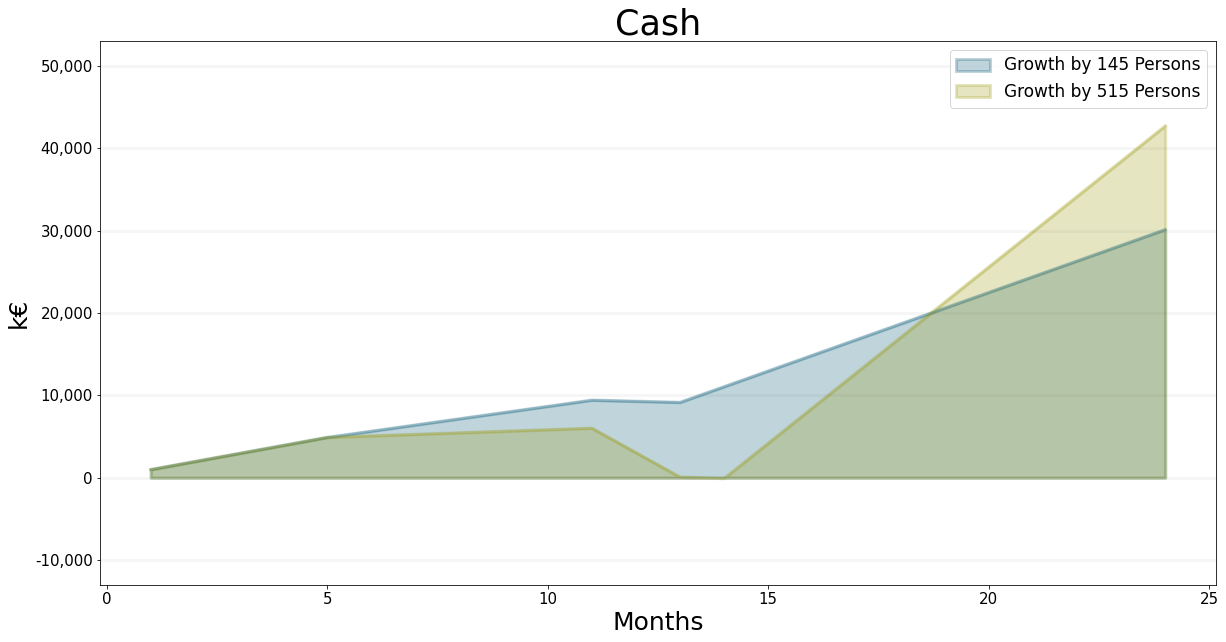

In [9]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth145Person','growth515Person'], 
    equations=["cash.cash"],
    title="Cash",
    x_label="Months",
    y_label="k€",
    series_names={
    "psf_growth145Person_cash.cash":"Growth by 145 Persons",
    "psf_growth515Person_cash.cash":"Growth by 515 Persons"
    }
)

In [10]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth515Person'], 
    equations=["cash.cash","cash.cashFlow"],
    title="Professional Staff",
    x_label="Months",
    y_label="k€",
    return_df=True,
      series_names={
    "psf_growth515Person_cash.cash":"Cash",
   "psf_growth515Person_cash.cashFlow":"Cash Flow"
    }
)

,Cash,Cash Flow
t,,
1.0,1000.000000,976.666667
2.0,1976.666667,976.666667
3.0,2953.333333,976.666667
4.0,3930.000000,976.666667
5.0,4906.666667,187.000000
6.0,5093.666667,187.000000
7.0,5280.666667,187.000000
8.0,5467.666667,187.000000
9.0,5654.666667,187.000000


Why does this happen? 

This is where having a simulation comes in handy - if we take a look at our revenue in month eleven, we see that this is much lower than expected. If you look at the project backlog, we can see why: the number of project weeks actually increases from 320 to 572, though we expected the level to stay at 320. The reason for this is that we can never deliver more projects weeks than are in the project backlog. In our case, the project backlog is at 320. In month eleven, because of the new staff, we would like to deliver 404 weeks of project, due to the new staff. But there are only 320 weeks in the backlog. On the other hand, thanks to the new business development staff we actually have 143 * 4 = 572 projects incoming. So in month 11 we arrive at 572 net new weeks of projects, but the staff is underutilized for one month.

The table below shows these figures along with the utilization.

In [11]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth515Person'], 
    equations=["revenue.revenue","projects.projects","kpi.projectBacklog","projects.winningProjects","projects.deliveringProjects",
              "kpi.utilization%"],
    title="Professional Staff",
    x_label="Months",
    y_label="k€",
    return_df=True,
      series_names={
    "psf_growth515Person_revenue.revenue":"Revenue",
    "psf_growth515Person_projects.projects":"Projects",
     "psf_growth515Person_kpi.projectBacklog":"Project Backlog",
           "psf_growth515Person_projects.winningProjects":"Winning Projects",
           "psf_growth515Person_projects.deliveringProjects":"Delivering Projects",
            "psf_growth515Person_kpi.utilization%":"Utilization %",
          
    }
)

,Revenue,Projects,Project Backlog,Winning Projects,Delivering Projects,Utilization %
t,,,,,,
1.0,2816.0,320.0,2.000000,160.0,160.0,100.000000
2.0,2816.0,320.0,2.000000,160.0,160.0,100.000000
3.0,2816.0,320.0,2.000000,160.0,160.0,100.000000
4.0,2816.0,320.0,2.000000,160.0,160.0,100.000000
5.0,2816.0,320.0,1.320132,160.0,160.0,66.006601
6.0,2816.0,320.0,1.320132,160.0,160.0,66.006601
7.0,2816.0,320.0,1.320132,160.0,160.0,66.006601
8.0,2816.0,320.0,1.320132,160.0,160.0,66.006601
9.0,2816.0,320.0,1.320132,160.0,160.0,66.006601


There is not much we can do about this because our backlog just isn't large enough to deal with so many new staff. What we can do of course is hire fewer people to ensure we don't go bankrupt. Our cash level drops to EUR -70,000, which corresponds to around 7 Staff people. So if we hire 2 fewer business developers und thus 10 people less all together we should be ok.

I've plotted and tabluated the data for this scenario below

In [12]:
bptk.register_scenarios(scenario_manager="psf",scenarios={
"growth505Person":{
"points":{
"staff.hiringRate":[[1, 101], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 404], [8, 0], 
                                            [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], 
                                            [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0]],
"staff.businessDevelopmentAllocation%":[[1, 20], [2, 20], [3, 20], [4, 20], [5, 14100/301], 
                                            [6, 14100/301],[7, 14100/301], [8, 14100/301], [9, 14100/301], [10, 14100/301], [11,20], 
                                            [12, 20], [13, 20], [14, 20], [15, 20], [16, 20], [17, 20], [18,20], [19, 20], [20, 20], 
                                            [21, 20], [22, 20], [23, 20], [24, 20]]
}
}})

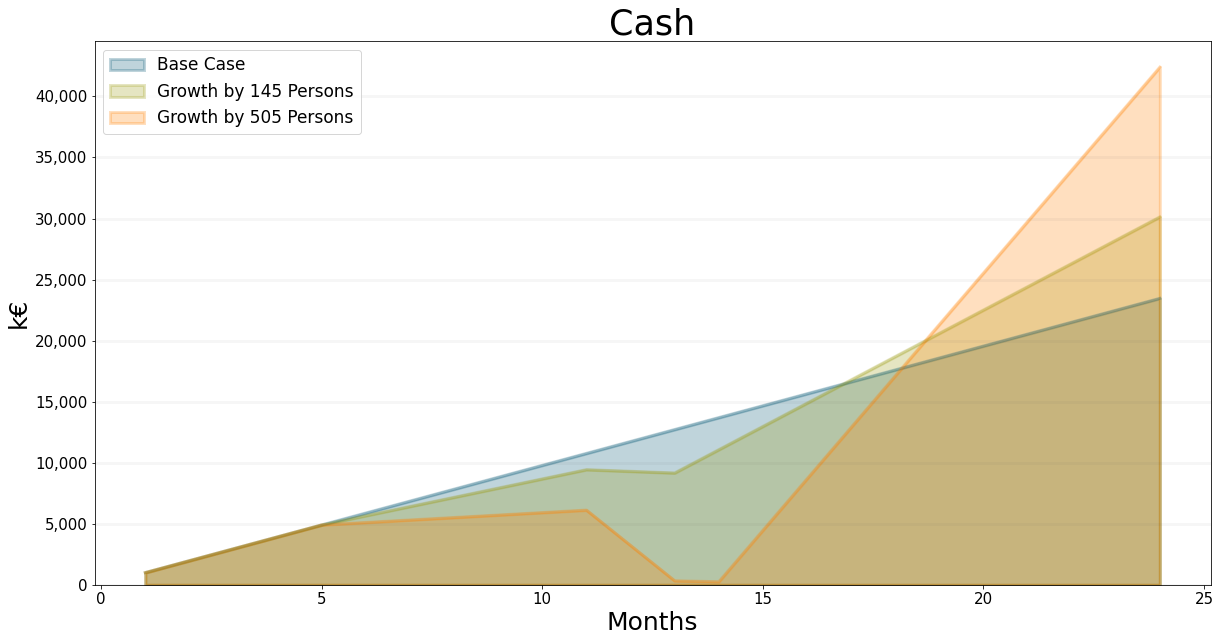

In [13]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['base','growth145Person','growth505Person'], 
    equations=["cash.cash"],
    title="Cash",
    x_label="Months",
    y_label="k€",
     series_names={
         "psf_base_cash.cash":"Base Case", 
    "psf_growth145Person_cash.cash":"Growth by 145 Persons",
    "psf_growth505Person_cash.cash":"Growth by 505 Persons"
    }
)

In [14]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth505Person'], 
    equations=["cash.cash","cash.cashFlow","revenue.revenue","projects.projects","cost.staffCost"],
    title="Professional Staff",
    x_label="Months",
    y_label="k€",
    return_df=True,
      series_names={
    "psf_growth505Person_revenue.revenue":"Revenue",
    "psf_growth505Person_projects.projects":"Projects",
     "psf_growth505Person_cash.cash":"Cash",
           "psf_growth505Person_cash.cashFlow":"Cash Flow",
           "psf_growth505Person_cost.staffCost":"Staff Cost"
          
    }
)

,Cash,Cash Flow,Revenue,Projects,Staff Cost
t,,,,,
1.0,1000.000000,976.666667,2816.0,320.0,1533.333333
2.0,1976.666667,976.666667,2816.0,320.0,1533.333333
3.0,2953.333333,976.666667,2816.0,320.0,1533.333333
4.0,3930.000000,976.666667,2816.0,320.0,1533.333333
5.0,4906.666667,202.333333,2816.0,320.0,2307.666667
6.0,5109.000000,202.333333,2816.0,320.0,2307.666667
7.0,5311.333333,202.333333,2816.0,320.0,2307.666667
8.0,5513.666667,202.333333,2816.0,320.0,2307.666667
9.0,5716.000000,202.333333,2816.0,320.0,2307.666667


Note that this means we reach our _expert target cash level_, as shown in the graph below:

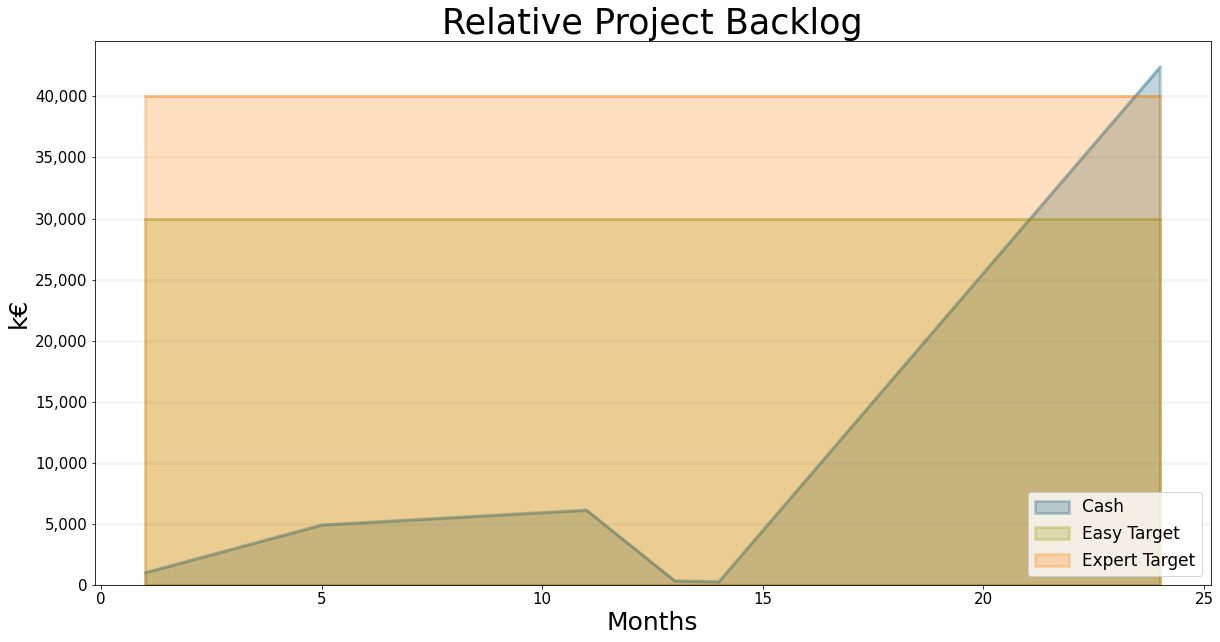

In [15]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth505Person'], 
    equations=["cash.cash","cash.easyTargetCash","cash.expertTargetCash"],
    title="Relative Project Backlog",
    x_label="Months",
    y_label="k€",
    series_names={
    "psf_growth505Person_cash.cash":"Cash", 
    "psf_growth505Person_cash.easyTargetCash":"Easy Target",
    "psf_growth505Person_cash.expertTargetCash":"Expert Target"
    }
)

Is the maximum scenario realistic? Not really - even if you have had good sales figures in the past, it is unlikely you would bet EUR 10 Mio of cash on this, even if you could potentially make a surplus of nearly EUR 20 Mio compared to the base case. After all, our cash level drops to just EUR 250,000 - if the company lost just one project (!) it would be bust. Also it is not really realistic to grow in such large steps without losing momentum due to training the new employees and constant reorganisation to accommodate the growth rate. 

---

## A More Realistic Scenario: Steady Growth

A more realistic scenario would be to strive for a continuous growth rate somewhere between 10-25%. In such a scenario, employees are allocated between business development and project delivery as needed.

This scenario is actually quite difficult to handle – I've plotted the graph for the staff and cash development below:

In [16]:
bptk.register_scenarios(scenario_manager="psf",scenarios={
"baseLong":{
},
             "steadyGrowth2Pct":{
                 "constants":{
                 "staff.steadyGrowthRate%":2,
                 "kpi.steadyGrowthPolicyOn":1
                 }

             },
             "steadyGrowth2PctMinBusDev":{
                 "constants":{
                 "staff.steadyGrowthRate%":2,
                 "kpi.steadyGrowthPolicyOn":1,
                 "kpi.minimumBusDevAllocationOn":1
                 }
             
             }

})

In [17]:
# simulate the following scenarios over 48 months
bptk.get_scenario(scenario_manager="psf",scenario="baseLong").model.stoptime=48
bptk.get_scenario(scenario_manager="psf",scenario="steadyGrowth2Pct").model.stoptime=48
bptk.get_scenario(scenario_manager="psf",scenario="steadyGrowth2PctMinBusDev").model.stoptime=48

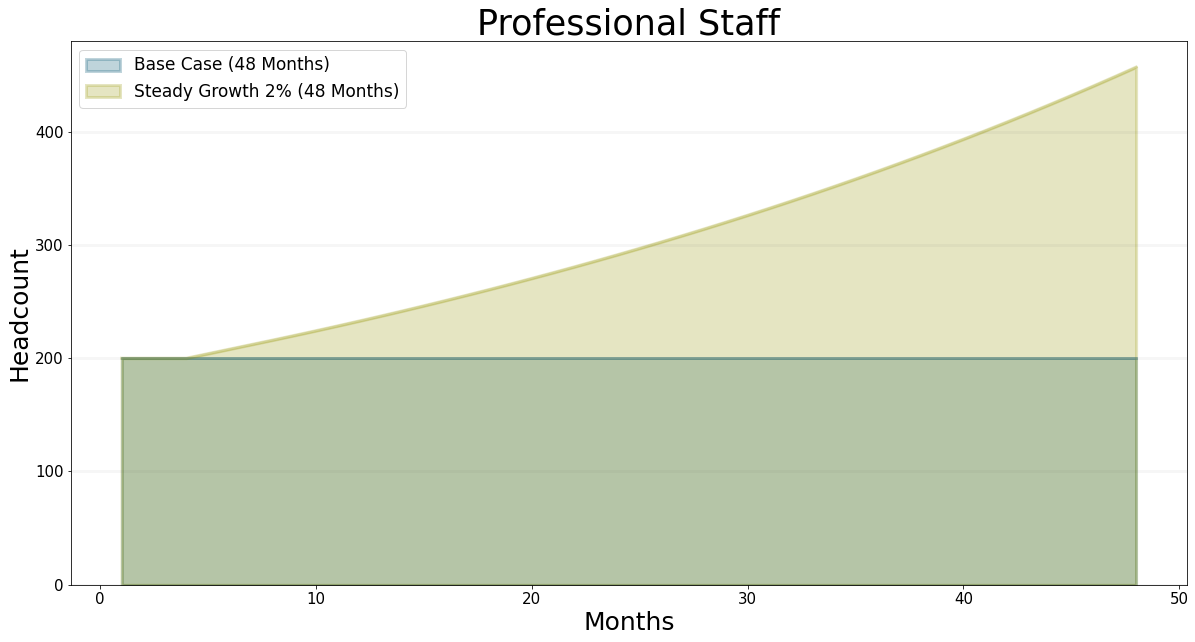

In [18]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct'], 
    equations=["staff.professionalStaff"],
    title="Professional Staff",
    x_label="Months",
    y_label="Headcount",
    series_names={
    "psf_baseLong_staff.professionalStaff":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_staff.professionalStaff":"Steady Growth 2% (48 Months)"
    }
)

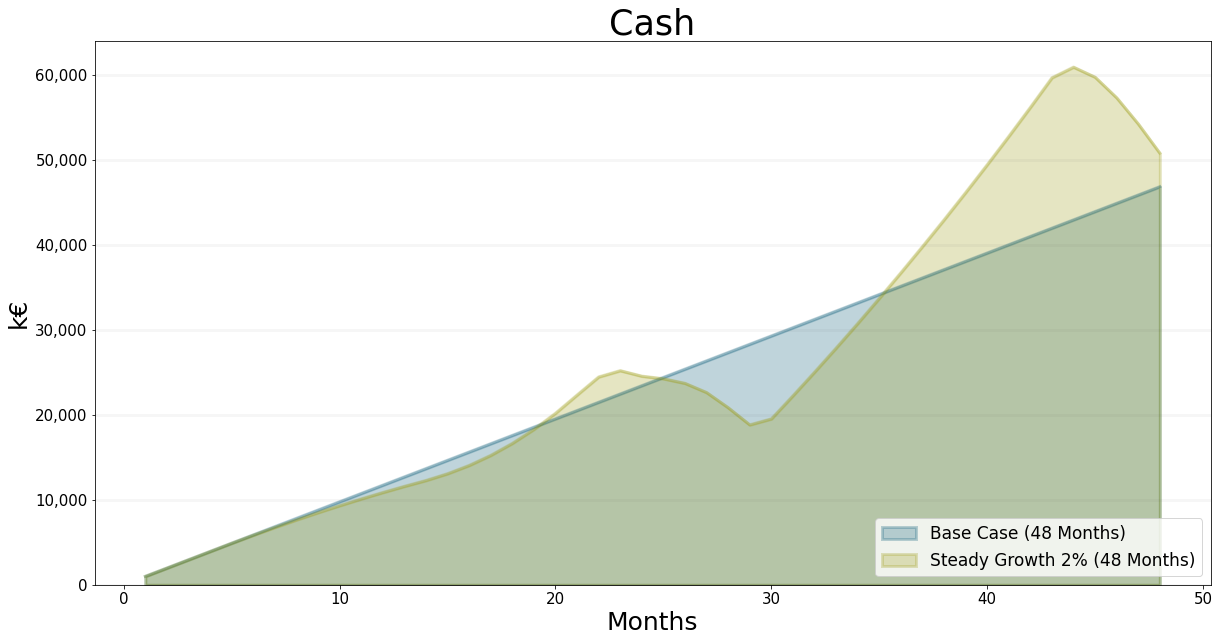

In [19]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct'], 
    equations=["cash.cash"],
    title="Cash",
    x_label="Months",
    y_label="k€",
    series_names={
    "psf_baseLong_cash.cash":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_cash.cash":"Steady Growth 2% (48 Months)"
    }
)

As you can see we achive very steady growth in personell - but the cash level drops initially (as expected) then increases, then drops again very aggressively.

What is happening?

This is best explained by looking at the allocation of staff. and the backlog of project weeks: First of all the new hires are assiged to business development. Then new projects start rolling in at quite a rate, so all the staff is assigned to work on projects - in this case the allocation of business development staff drops below the critical 20% needed to ensure enough projects are acquired in the long run. 

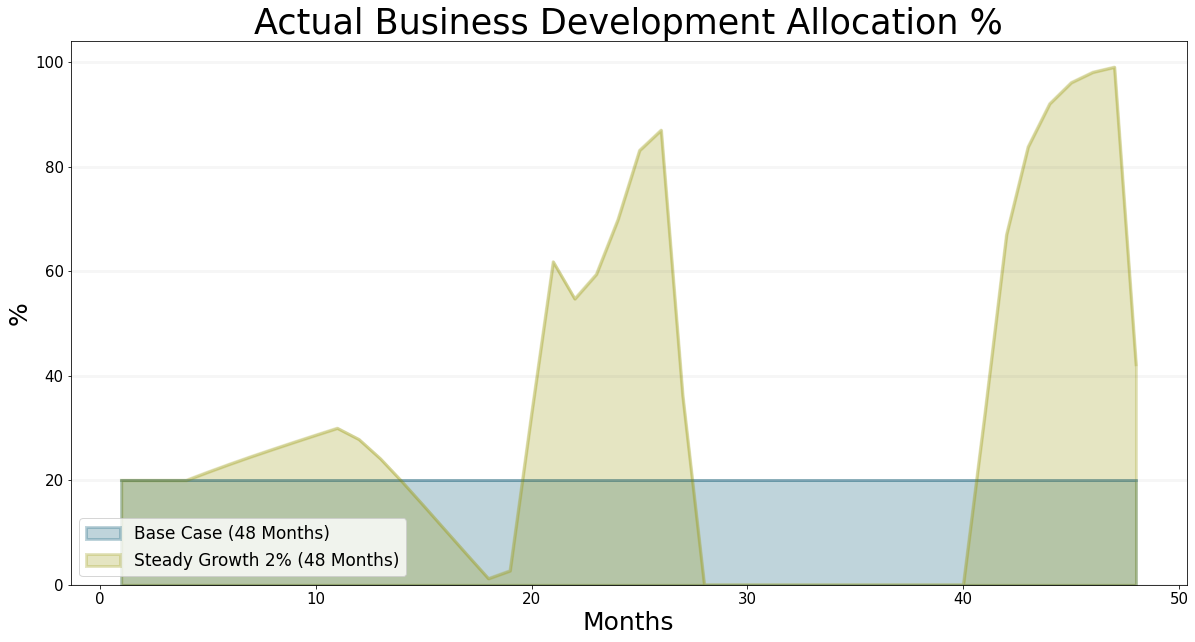

In [20]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct'], 
    equations=["staff.actualBusinessDevelopmentAllocation%"],
    title="Actual Business Development Allocation %",
    x_label="Months",
    y_label="%",
    series_names={
    "psf_baseLong_staff.actualBusinessDevelopmentAllocation%":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_staff.actualBusinessDevelopmentAllocation%":"Steady Growth 2% (48 Months)"
    }
)

Needless to say, the project backlog starts to drop quite quickly and suddenly there are far to few projects in the project pipeline - now all staff are allocated to business development.

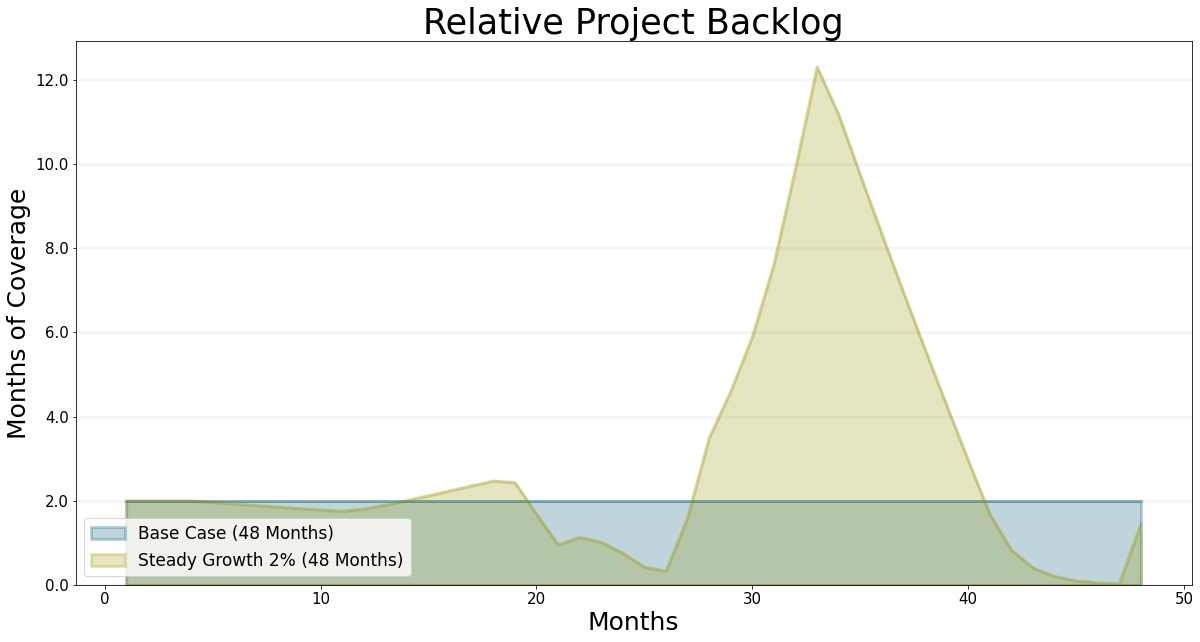

In [21]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct'], 
    equations=["kpi.projectBacklog"],
    title="Relative Project Backlog",
    x_label="Months",
    y_label="Months of Coverage",
    series_names={
    "psf_baseLong_kpi.projectBacklog":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_kpi.projectBacklog":"Steady Growth 2% (48 Months)"
    }
)

This scenario is actually very common in reality, unfortunately I know this not only from our clients but also form my own personal experience: what management does is to hire a few business developers when things are going well. Of course the cash flow immediately get's worse, which always feels bad. So then one doesn't like to hire project staff, because after all, maybe the business developers will not be successfull. So when projects finally roll in, you don't have enough project delivery capacity. So you assign business developers to project work, which helps in the short run, but unfortunately means you are doing to little project acquisition work...

What can we do about this? 

The most important thing to do is to ensure that we always have at least 20% of staff assigned to business development – believe me, this is really hard to do in practice.

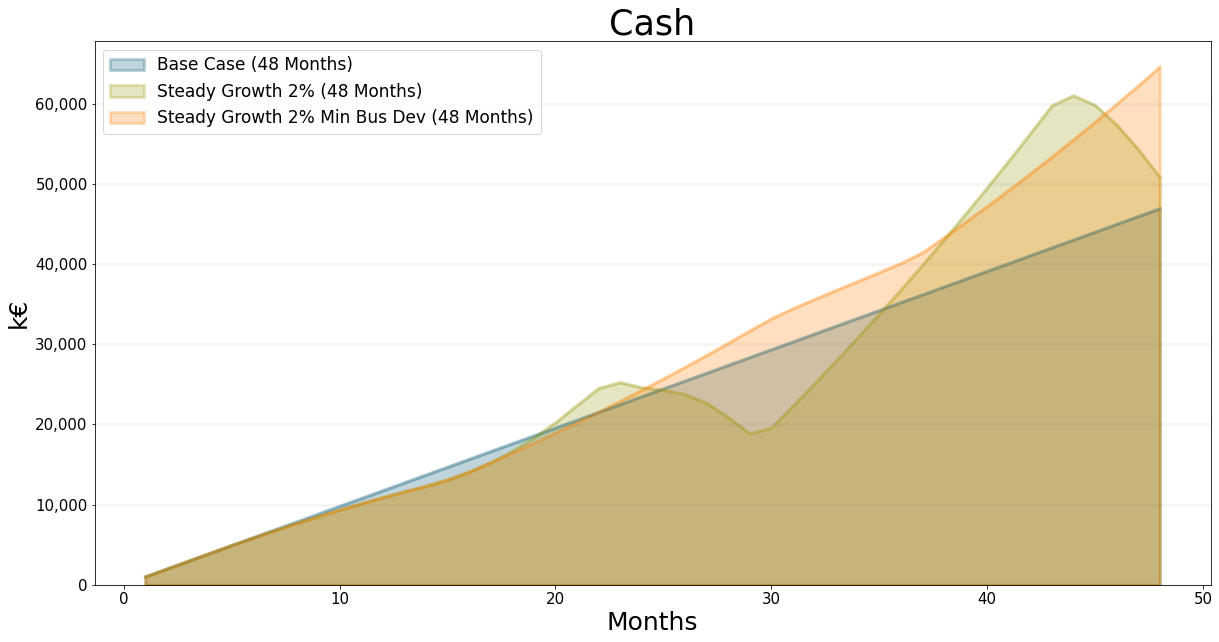

In [22]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct','steadyGrowth2PctMinBusDev'], 
    equations=["cash.cash"],
    title="Cash",
    x_label="Months",
    y_label="k€",
    series_names={
    "psf_baseLong_cash.cash":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_cash.cash":"Steady Growth 2% (48 Months)",
        "psf_steadyGrowth2PctMinBusDev_cash.cash":"Steady Growth 2% Min Bus Dev (48 Months)"
    }

)

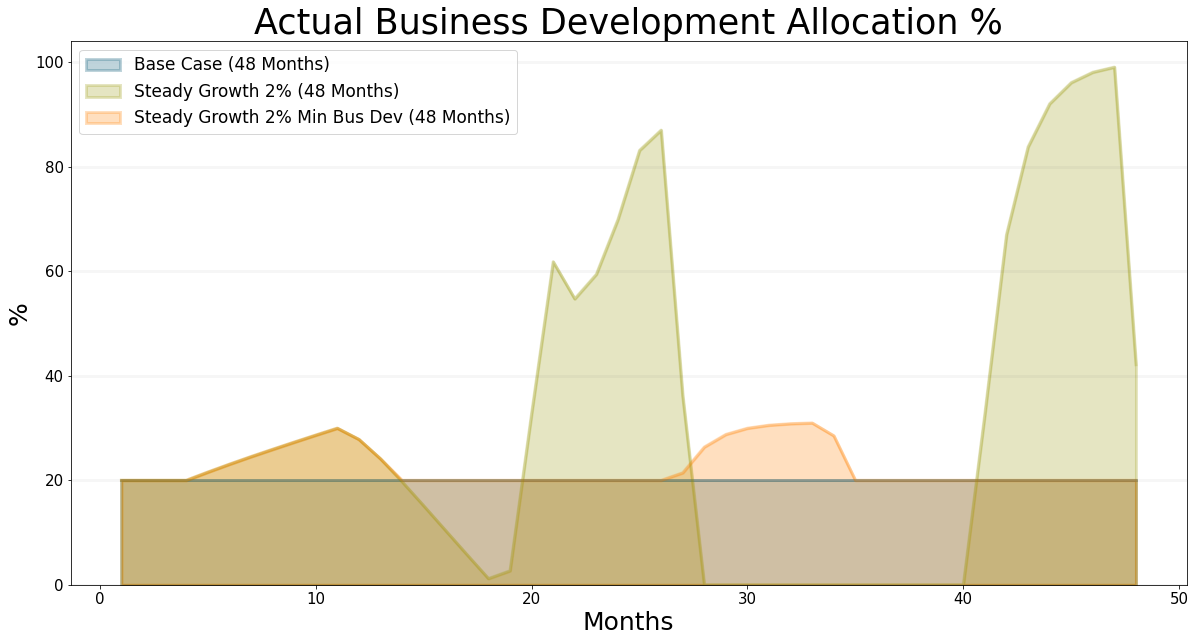

In [23]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct','steadyGrowth2PctMinBusDev'], 
    equations=["staff.actualBusinessDevelopmentAllocation%"],
    title="Actual Business Development Allocation %",
    x_label="Months",
    y_label="%",
    series_names={
    "psf_baseLong_staff.actualBusinessDevelopmentAllocation%":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_staff.actualBusinessDevelopmentAllocation%":"Steady Growth 2% (48 Months)",
        "psf_steadyGrowth2PctMinBusDev_staff.actualBusinessDevelopmentAllocation%":"Steady Growth 2% Min Bus Dev (48 Months)"
    }
)

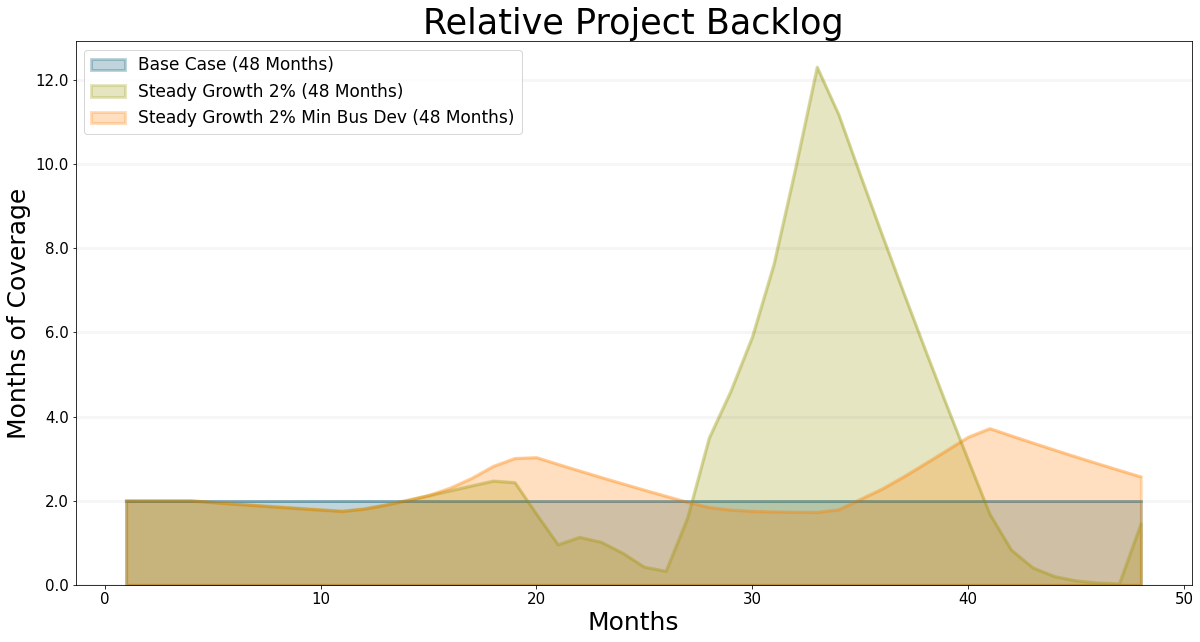

In [24]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct','steadyGrowth2PctMinBusDev'], 
    equations=["kpi.projectBacklog"],
    title="Relative Project Backlog",
    x_label="Months",
    y_label="Months of Coverage",
    series_names={
    "psf_baseLong_kpi.projectBacklog":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_kpi.projectBacklog":"Steady Growth 2% (48 Months)",
        "psf_steadyGrowth2PctMinBusDev_kpi.projectBacklog":"Steady Growth 2% Min Bus Dev (48 Months)"
    }
)

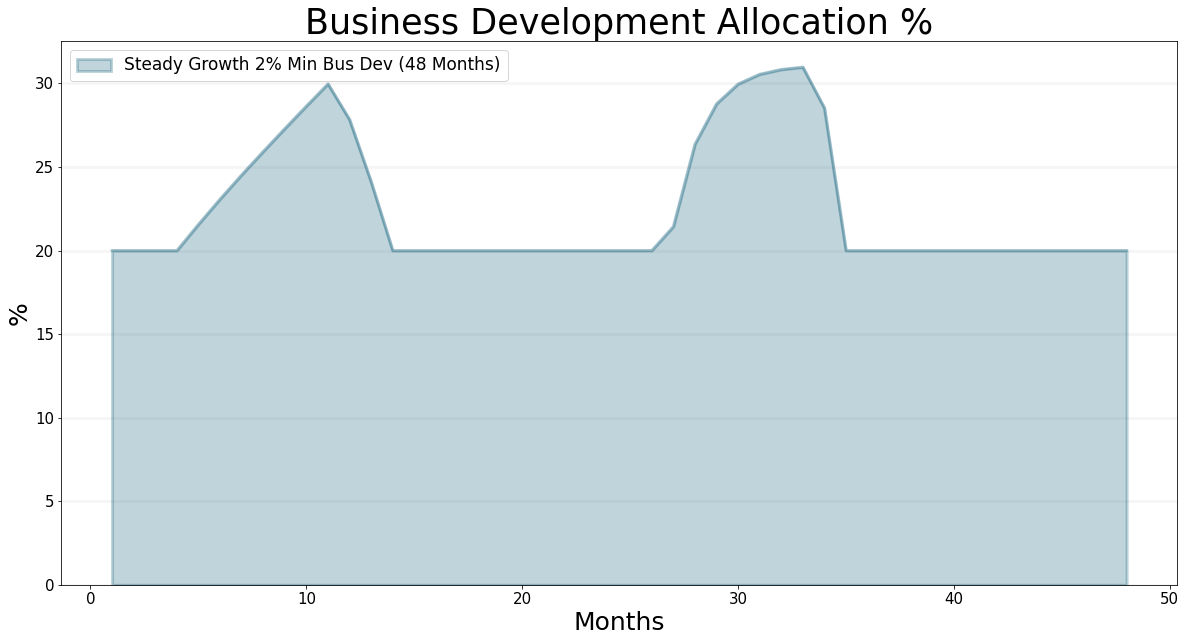

In [25]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['steadyGrowth2PctMinBusDev'], 
    equations=["staff.actualBusinessDevelopmentAllocation%"],
    title="Business Development Allocation %",
    x_label="Months",
    y_label="%",
    series_names={
    
        "psf_steadyGrowth2PctMinBusDev_staff.actualBusinessDevelopmentAllocation%":"Steady Growth 2% Min Bus Dev (48 Months)"
    }
)

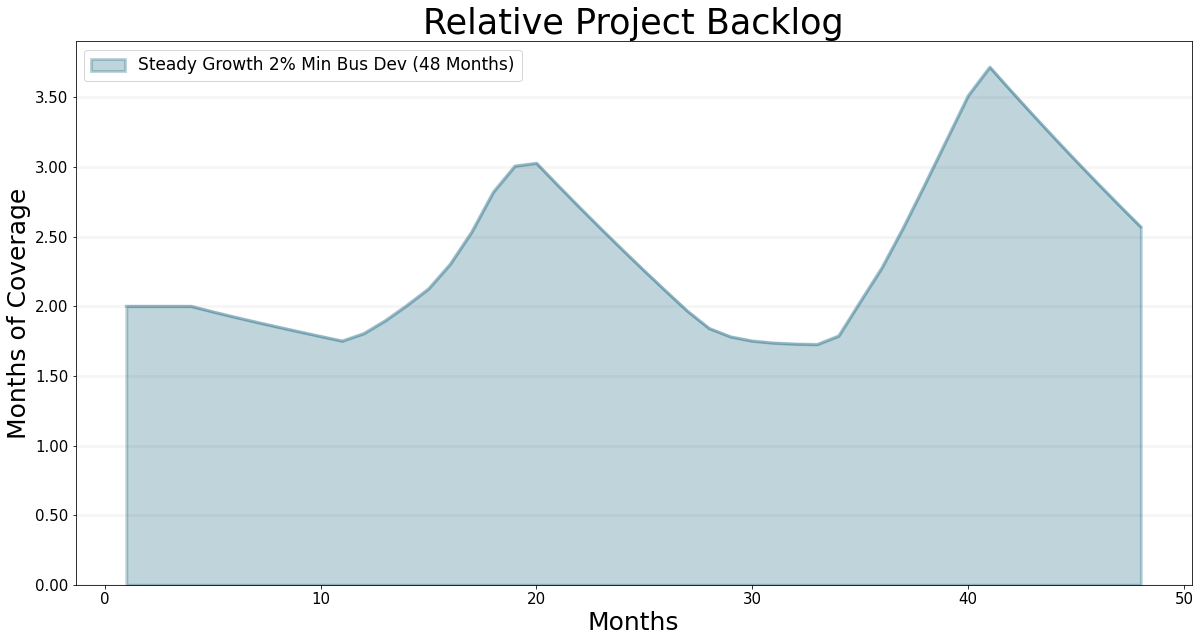

In [26]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['steadyGrowth2PctMinBusDev'], 
    equations=["kpi.projectBacklog"],
    title="Relative Project Backlog",
    x_label="Months",
    y_label="Months of Coverage",
    series_names={
    
        "psf_steadyGrowth2PctMinBusDev_kpi.projectBacklog":"Steady Growth 2% Min Bus Dev (48 Months)"
    }
)

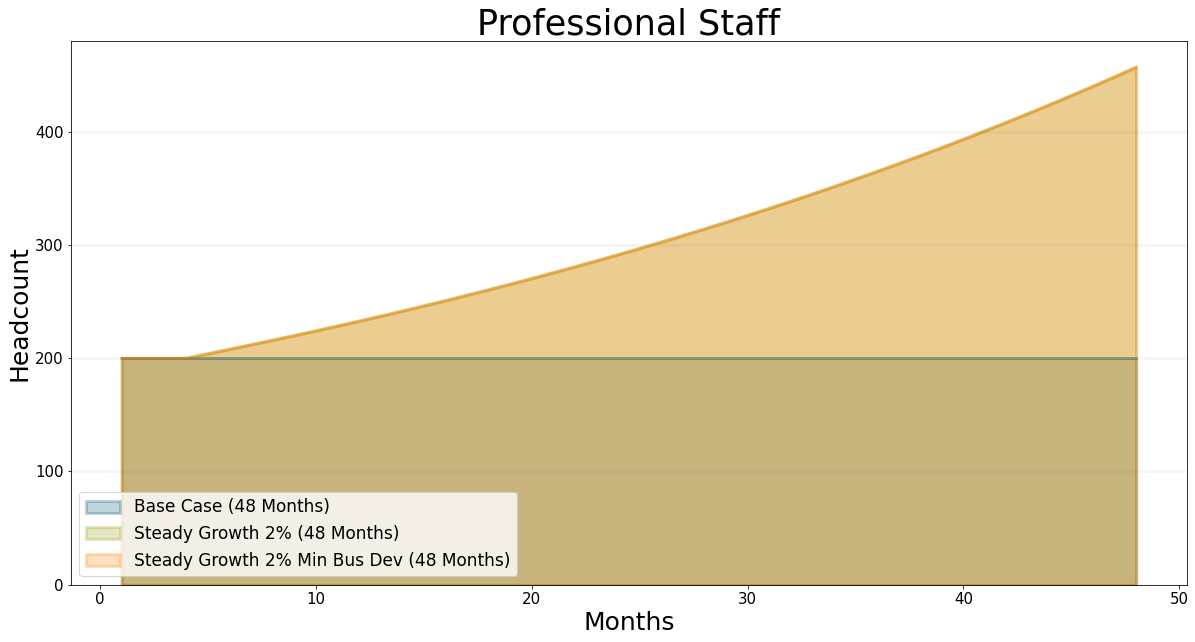

In [27]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['baseLong','steadyGrowth2Pct','steadyGrowth2PctMinBusDev'], 
    equations=["staff.professionalStaff"],
    title="Professional Staff",
    x_label="Months",
    y_label="Headcount",
    series_names={
    "psf_baseLong_staff.professionalStaff":"Base Case (48 Months)", 
    "psf_steadyGrowth2Pct_staff.professionalStaff":"Steady Growth 2% (48 Months)",
        "psf_steadyGrowth2PctMinBusDev_staff.professionalStaff":"Steady Growth 2% Min Bus Dev (48 Months)"
    }
)

---

## Summary and Learnings

How can the discussion above help you to make your professional service firm grow?

For me there are two key learnings: First of all, even in a stable environment, achieving high growth rates will cost you a lot of money in the short run and can easily bring your company to the brink of bankruptcy. So you need to be clear about how much risk you are going to take, how you will measure whether you are on the right track and what you will do if things start going wrong. If you are managing your own professional service firm, then I think it is also important to ask the question whether growth is an important goal and why.

The second - and to me the more important learning - is that is very easy to fall into the trap of doing to little business development when everything is running smoothly which then quickly leads to the oscillatory behaviour we discussed above.

To mitigate this problem in practice there are two things you need to do: first, be very disciplined about business development and keep up your effort even when you have too much work. Second, to ensure you can deal with inevitable peaks in utilization make sure you have trustworthy freelance delivery staff or a network of partner companies that can provide you with extra capacity when you need it.